In [ ]:
# Train a CNN with MNIST dataset

# Reference:
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [2]:
# Data
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [4]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# consistency with keras
from keras import backend as K

img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [12]:
# Model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 292s 5ms/step - loss: 0.0471 - acc: 0.9859 - val_loss: 0.0324 - val_acc: 0.9895
Epoch 2/3
60000/60000 [==============================] - 297s 5ms/step - loss: 0.0293 - acc: 0.9908 - val_loss: 0.0272 - val_acc: 0.9918
Epoch 3/3
60000/60000 [==============================] - 275s 5ms/step - loss: 0.0193 - acc: 0.9939 - val_loss: 0.0279 - val_acc: 0.9904
Test loss: 0.02786233626063913
Test accuracy: 0.9904


In [15]:
model.save('mnist_cnn.h5')

In [ ]:
# Exercise:
#
# Setup Tensorboard. Check for overfit / underfit from the plots
# Experiment with removing MaxPool (compare tensorboard plot and score)
# Experiment with more or less filters (effect on score):
#  Filter size: 16, 32
#  Filter size: 64, 128

# Visualize convolutional layers

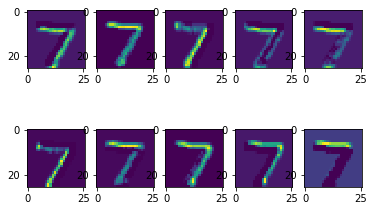

In [41]:
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

def visualize(data, layer_index):

    # intermediate model with input and nth layer layer only
    int_model = Model(inputs=model.input,
                      outputs=model.layers[layer_index].output)

    output = int_model.predict(np.expand_dims(data, axis=0))[0]
    
    # first 10 feature maps
    fig, axes = plt.subplots(nrows=2, ncols=5)
    axes = axes.flatten()

    for i in range(len(axes)):
        axes[i].imshow(output[:, :, i])
    
visualize(X_test[0], 0)

In [42]:
model.layers

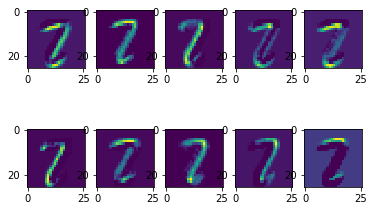

In [65]:
visualize(X_test[321], 0)

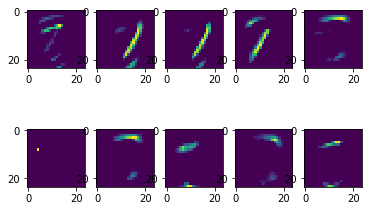

In [66]:
visualize(X_test[321], 1)

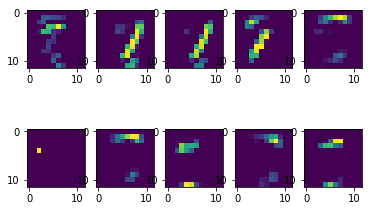

In [67]:
visualize(X_test[321], 2)

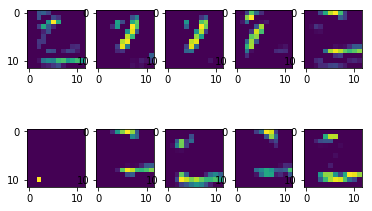

In [70]:
visualize(X_test[1], 2)

In [61]:
np.argmax(y_test, axis=1)[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

In [60]:
pred = model.predict_classes(X_test)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [64]:
# find test with incorrect prediction
np.argmax(np.argmax(y_test, axis=1) != pred)

321

In [69]:
# truth
np.argmax(y_test, axis=1)[321]

2

In [68]:
# prediction
pred[321]

7

In [71]:
# How to print layer info
# https://github.com/keras-team/keras/issues/91

for layer in model.layers:
    g = layer.get_config()
    h = layer.get_weights()
    print(g)
    print(h)

{'name': 'conv2d_3', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[[[ 0.2180723 , -0.06659871, -0.07424264,  0.17135014,
           0.2457842 , -0.14364019, -0.1062628 ,  0.06728543,
           0.06809814, -0.2199635 , -0.05241701, -0.09536486,
           0.02001875, -0.01093138, -0.08396446, -0.09788153,
           0.11094639,  0.10080877,  0.06758786,  0.21429527,
           0.18237282,  0.07898905, -0.23877293, -0.1623342 ,
          -0.34

In [72]:
l = model.layers[0]
l.get_config()

{'name': 'conv2d_3',
 'trainable': True,
 'batch_input_shape': (None, 28, 28, 1),
 'dtype': 'float32',
 'filters': 32,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [96]:
# How to get the weights for a given Conv Layer
w = np.array(l.get_weights())

print('bias', w[1].shape, w[1])
print('filters/kernels', w[0].shape, w[0])

bias (64,) [-0.01069099  0.02272674 -0.01756068 -0.00936664  0.00280084 -0.01668407
  0.01923493  0.02436849  0.02511405 -0.02559339 -0.05481247 -0.03853135
 -0.00108748 -0.01878266 -0.05932373 -0.01748224  0.00078016 -0.0074584
 -0.0591137  -0.04082584 -0.05438323 -0.01958195  0.00539558 -0.03734969
 -0.02116414 -0.00367418 -0.02522313 -0.00149765  0.03983466  0.02258543
 -0.0197644  -0.0324271  -0.01191538  0.02768488 -0.01818716 -0.02297566
 -0.04350472 -0.00267011 -0.00640231 -0.00981226 -0.02337164  0.00724582
 -0.0157563  -0.02746685 -0.03069875 -0.04647975 -0.01761444 -0.03327103
 -0.01227138 -0.04837846 -0.01293415 -0.04519193 -0.01316861 -0.01785816
  0.01987362 -0.00952165 -0.01300839 -0.00864334 -0.00807639 -0.02497816
 -0.01392487 -0.03931912 -0.03319716 -0.02579213]
filters/kernels (3, 3, 32, 64) [[[[-0.08571415  0.13301696  0.07425725 ... -0.03373678  0.00929826
    -0.04612197]
   [ 0.01916631 -0.03605748 -0.031881   ... -0.01927061  0.05786519
     0.03094606]
   [ 0.09

In [97]:
# weights for Conv layer 2

l = model.layers[1]
l.get_config()

# filters (kernels) for Conv layer 1
w = np.array(l.get_weights())

print('bias', w[1].shape, w[1])
print('filters/kernels', w[0].shape, w[0])

bias (64,) [-0.01069099  0.02272674 -0.01756068 -0.00936664  0.00280084 -0.01668407
  0.01923493  0.02436849  0.02511405 -0.02559339 -0.05481247 -0.03853135
 -0.00108748 -0.01878266 -0.05932373 -0.01748224  0.00078016 -0.0074584
 -0.0591137  -0.04082584 -0.05438323 -0.01958195  0.00539558 -0.03734969
 -0.02116414 -0.00367418 -0.02522313 -0.00149765  0.03983466  0.02258543
 -0.0197644  -0.0324271  -0.01191538  0.02768488 -0.01818716 -0.02297566
 -0.04350472 -0.00267011 -0.00640231 -0.00981226 -0.02337164  0.00724582
 -0.0157563  -0.02746685 -0.03069875 -0.04647975 -0.01761444 -0.03327103
 -0.01227138 -0.04837846 -0.01293415 -0.04519193 -0.01316861 -0.01785816
  0.01987362 -0.00952165 -0.01300839 -0.00864334 -0.00807639 -0.02497816
 -0.01392487 -0.03931912 -0.03319716 -0.02579213]
filters/kernels (3, 3, 32, 64) [[[[-0.08571415  0.13301696  0.07425725 ... -0.03373678  0.00929826
    -0.04612197]
   [ 0.01916631 -0.03605748 -0.031881   ... -0.01927061  0.05786519
     0.03094606]
   [ 0.09